## Smart-Healthcare

### Big Data Project [Elective-II Course]
Bachelor of Computer Engineering (BCT)

Institute of Engineering, Pulchowk Campus
----------------------------------------------------
UCI ML Dataset: 
Diabetes 130-US hospitals for years 1999-2008 Data Set 

Random Forest Classifier Analysis
----------------------------------------

In [0]:
# execute this block when running on google colab
!apt-get install openjdk-8-jdk
!wget https://www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz 
!tar xf spark-2.4.3-bin-hadoop2.7.tgz
!pip install findspark
!pip install handyspark

In [2]:
ls

sample_data/  spark-2.4.3-bin-hadoop2.7/  spark-2.4.3-bin-hadoop2.7.tgz


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

## Clone the repo

In [4]:
!git clone https://github.com/atosh502/smarter-healthcare.git

Cloning into 'smarter-healthcare'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 51 (delta 11), reused 34 (delta 4), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [5]:
%cd /content/smarter-healthcare

/content/smarter-healthcare


## Initialize SparkContext

In [0]:
import findspark
from handyspark import *
findspark.init()
from pyspark import SparkContext, SparkConf
sc = SparkContext(master="local[4]")

In [0]:
##import RandomForest
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()

In [0]:
##read pre-processed dataset
df=spark.read.parquet("./parquet_files/dataset.parquet")

In [0]:
df.show()

In [0]:
label="readmitted"
features=df.drop("readmitted").columns

In [0]:
vassem=VectorAssembler(inputCols=features,outputCol="features")
data=vassem.transform(df).select(label,"features")
data.show()

## Split the dataset into training and testing

In [0]:
train,test=data.randomSplit([0.7,0.3])

## Instantiate and Train the model

In [0]:
##instantiate RandomForestClassifier
rfc=RandomForestClassifier(labelCol="readmitted", featuresCol="features", maxDepth=10, maxBins=2400000, numTrees=130,impurity='gini')
##train the model
model=rfc.fit(train)

## Make Predictions

In [0]:
predictions=model.transform(test)

In [0]:
predictions.show(10)

## Evaluate our model

In [17]:
## Check Accuracy
correct_predictions=predictions.select("*").where(predictions['readmitted']==predictions['prediction'])
accuracy=correct_predictions.count()/predictions.count()
print("prediction accuracy ",accuracy)

prediction accuracy  0.6201914886367508


In [0]:
##handy spark 
## get classification metrics
bcm = BinaryClassificationMetrics(predictions, scoreCol='probability', labelCol='readmitted')

In [19]:
bcm.areaUnderROC

0.6623121310749728

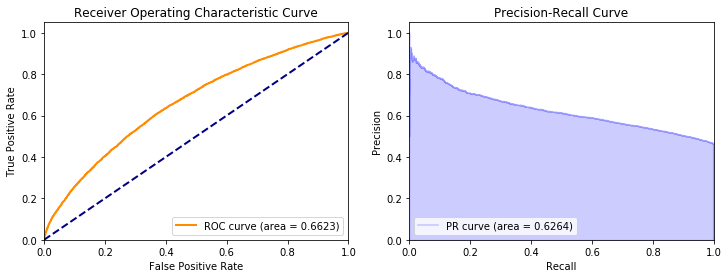

In [20]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])

## Confusion Matrix

In [24]:
bcm.print_confusion_matrix(.5)

Predicted        
                 0       1
Actual 0   11664.0  4067.0
       1    7080.0  6538.0